# Evaluating optimal K-means clusters

This additional module evaluates the optimal number of clusters for the scraped documents


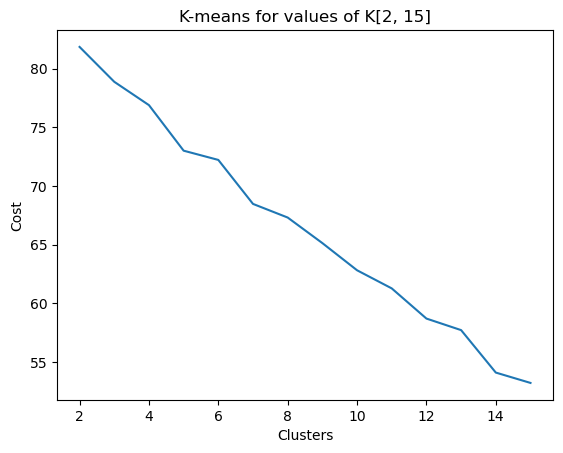

In [1]:
import matplotlib.pyplot as plt

from clustering import TextClusterer
from sklearn.cluster import KMeans


def plot_loss(data) -> None:
    k_range = range(2, 16)
    cost = [
        (KMeans(n_clusters=k, random_state=0, max_iter=100).fit(data).inertia_)
        for k in k_range
    ]

    # Plot loss function
    plt.plot(k_range, cost)
    plt.ylabel("Cost")
    plt.xlabel("Clusters")
    plt.title("K-means for values of K[2, 15]")
    plt.show()


clusterer = TextClusterer()
raw = clusterer.get_raw_text("../../output/raw_text.json")
tf_idf_vectors = clusterer.vectorize_text(raw)
lsa_tfidf = clusterer.reduce_dimensions(tf_idf_vectors)
plot_loss(lsa_tfidf)